# 목차
[1. 들어가며](#1-들어가며)


[2. 디지털 이미지](#2-디지털-이미지)


[3. Pillow 사용법](#3-Pillow사용법)


[4. Pillow를 활용한 데이터 전처리](#4--Pillow를-활용한-데이터-전처리)


[5. OpenCV](#5-OpenCV)


[6. 비슷한 이미지 찾아내기](#6-비슷한-이미지-찾아내기)

# 1. 들어가며
구글 이미지 검색에 이미지 파일을 업로드하여 비슷한 이미지들을 찾아볼 수 있다.    
주로 openCV를 통한 이미지 다루기를 이용하는데 이를 알아보자.


**색상 히스토그램을 기반으로 주어진 이미지들 중 비슷한 색상 분포를 가지고 있는 이미지를 찾아주는 기능을 구현해보자.**


### 학습목표
- 컴퓨터에서 이미지가 표현되는 방식 이해
- Pillow와 OpenCV로 Python에서 이미지 파일을 열고 정보 추출
- CIFAR-100에서 히스토그램 기반으로 유사한 이미지 골라냄


이번 프로젝트에서는 `Pillow`, `OPenCV`, `Matplotlib` 패키지를 이용할 것이다.

# 2. 디지털 이미지

디지털 화며는 수많은 점들로 이루어져있다.
- **화소(pixel, picture element)**: 색상을 가지는 점 하나
- **RGB(Red, Green, Blue)**: 각화소는 세 개의 단일 색의 강도를 각각 조걸하여 색상을 표현


- **래스터(raster) or 비트맵(bitmap)**: 각 점 하나하나의 색상 값을 저장하는 방식
  - 한 점마다 각 색상별로 8비트를 사용하여 0 ~ 255 사이의 값(2^8=256)으로 색의 감도를 표시
- **벡터(vector)**: 상대적인 점과 선의 위치를 방적식으로 기록한 후 확대 및 축소에 따라 디지털 화면의 각 화소를 재계산하여 깨짐현상이 없음    



![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/VectorBitmapExample.svg/440px-VectorBitmapExample.svg.png)

디지털 화면의 화소로 표시되는 이미지를 저장하는 방법이 여러 가지인 것처럼,   
결국 RGB로 표시되는 색상 값도 RGB 형식으로만 저장될 필요는 없다.
- YUV방식: 흑백 채널에 이보다 1/4의 해상도를 가진 두 색상 채널을 덧붙여 송출하는 방식   
(아래)   
![[출처 : https://en.wikipedia.org/wiki/YUV]](https://upload.wikimedia.org/wikipedia/commons/thumb/2/29/Barn-yuv.png/300px-Barn-yuv.png)


- **HSV(Hue 색상, Saturation 채도, Value 명도)**: 디지털 화면에서 색감을 수치적으로 조작할 때 직관적으로 이해가 가능하여 자주 사용
- **CMYK(Cyan, Magenta, Yello, Black)**: 인쇄 매체의 경우 색의 강도를 높일수록 어두워지는 특성과, 자주사용되는 검정색을 표현할때    
잉크소모가 많아 Cyan, Magenta, Yello, Black 네 가지 색상을 사용   


색을 표현하는 다양한 방식을 각각 **컬러 스페이스(color space, 색 공간)**라 하며,   
각 컬러 스페이스를 구성하는 단일 축(RGB에서 각각 R, G, B)을  **채널(channel)**이라 한다.   
![https://en.wikipedia.org/wiki/HSL_and_HSV](https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/HSV_color_solid_cylinder_saturation_gray.png/394px-HSV_color_solid_cylinder_saturation_gray.png)

# 3. Pillow 사용법


>옛날 파이썬 이미지 처리는 PIL(Python Image Library)가 있었다.   
하지만, 2011년 마지막 커밋으로 개발이 중단되었다.   
대신 Pillow가 지속적으로 개발이 진행되고 있다.


**Pillow 사용법을 살펴보고 실습 데이터인 CIFAR-100 데이터를 전처리하는 작업을 진행해보자.**

1) PIL을 이용해 이미지를 생성   
2) 생성된 이미지는 **배열 형태의 데이터**   
  - 배열 형태의 데이터???
  - 예) 가로 세로 32픽셀에 RGB 세 가지 채널이 있다면, Numpy로 [32, 32, 3]차원 배열을 생성하고,   --------- (1)
  - 데이터 타입을 uint8, 즉 각 값이 부호가 없는(unsigned) 8비트 정수(integer)가 되어    
  0 ~ 255(2의 8승=256)사이의 값을 나타내도록 해야 됨               --------- (2)

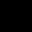

In [1]:
import numpy as np
from PIL import Image

data = np.zeros([32,32, 3], # (1)
                dtype=np.uint8) # (2)
image = Image.fromarray(data, 'RGB') # (3)
image

아주 작은 32 X 32 짜리 까만 이미지가 만들어졌다.  



3) 만들어진 배열을 `PIL.Image.fromarray()`를 통해 바로 이미지 객체로 변환한 뒤 표시하였다.--------(3)   
4) `np.zeros()`로 초기화된 모든 픽셀은 채널의 값이 0이기 때문에 검은색으로 나온다.   


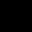

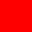

In [2]:
data[:, :]= [255, 0, 0]
image = Image.fromarray(data, 'RGB')
image

`np.zeros()`를 사용하지 않고 `data[:, :]= [255, 0, 0]`를 이용하여 빨간색의 값을 가지게 된다.


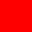

### 연습문제
    1. 가로 세로 각 128 픽셀짜리 흰색 이미지 만들기   


배경이 흰색이라 보이질 않내.

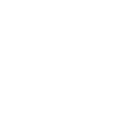

In [3]:
import numpy as np
from PIL import Image

data = np.zeros([128, 128, 3], dtype=np.uint8) # 가로 세로 128픽셀, uint8

data[:, :] = [255, 255, 255] # 흰색
image = Image.fromarray(data, 'RGB')
image

    2. 연습용 이미지를 열어 width와 height를 출력하고, .save()를 이용하여 jpg파일 포맷으로 저장

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

# 파일 경로 불러오기
image_path = '/content/gdrive/MyDrive/AIFFEL/python_image_proc/pillow_practice.png'

# 이미지 파일 열기
image = Image.open(image_path)
image

# width, height 출력
print(f'width: {image.width}, height: {image.height}')

# JPG 파일 형식 저장
new_image_path = '/content/gdrive/MyDrive/AIFFEL/python_image_proc/pillow_practice_jpg.jpg' # 저장위치 후 파일명
image = image.convert('RGB') # JPG 형식
image.save(new_image_path)

width: 620, height: 465


    3. .resize()를 이용하여 이미지 크기를 100 X 200으로 변경 저장해보자.

rezise (x: 100, y: 200)


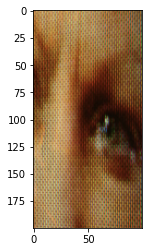

In [6]:
resized_image = image.resize((100, 200))
resize_image_path = '/content/gdrive/MyDrive/AIFFEL/python_image_proc/pillow_practice_resize.jpg'
resized_image.save(resize_image_path)
print('rezise (x: 100, y: 200)')
plt.imshow(resized_image)
plt.show()

    4. .crop()을 이용하여 눈 부분만 잘라내어 저장해보자.

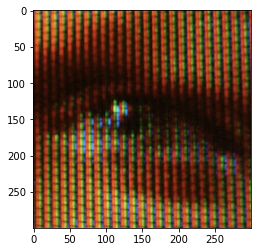

In [7]:
box = (300, 100, 600, 400)
region = image.crop(box)
cropped_image_path = '/content/gdrive/MyDrive/AIFFEL/python_image_proc/pillow_practice_crop.jpg'
region.save(cropped_image_path)
plt.imshow(region)
plt.show()

# 4. Pillow를 활용한 데이터 전처리


**CIFAR-100 데이터를 받아 개별 이미지 파일로 추출하기**   


---

1) 이미지 데이터베이스 구축을 위해 **CIFAR-100 데이터셋**을 활용   
2) 32 X 32 화소 해상도의 이미지가 100개 클래스당 600장(학습용 500, 테스트 100) 총 60,000장    
3) CIFAR-100 python version에 meta, test, train 파일이 있다.   
4) 이 중 train파일만 사용하여 train은 어떻게 구성되어 있는지 확인.

In [8]:
import os
import pickle
from PIL import Image

dir_path = '/content/gdrive/MyDrive/AIFFEL/python_image_proc/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

with open(train_file_path, 'rb') as f:
  train = pickle.load(f, encoding='bytes')

print(type(train))
# print(train)

<class 'dict'>
{b'filenames': [b'bos_taurus_s_000507.png', b'stegosaurus_s_000125.png', b'mcintosh_s_000643.png', b'altar_boy_s_001435.png', b'cichlid_s_000031.png', b'phone_s_002161.png', b'car_train_s_000043.png', b'beaker_s_000604.png', b'fog_s_000397.png', b'rogue_elephant_s_000421.png', b'computer_keyboard_s_000757.png', b'willow_tree_s_000645.png', b'sunflower_s_000549.png', b'palace_s_000759.png', b'adriatic_s_001782.png', b'computer_keyboard_s_001277.png', b'bike_s_000682.png', b'wolf_pup_s_001323.png', b'squirrel_s_002467.png', b'sea_s_000678.png', b'shrew_s_002233.png', b'pine_tree_s_000087.png', b'rose_s_000373.png', b'surveillance_system_s_000769.png', b'pine_s_001533.png', b'table_s_000897.png', b'opossum_s_001237.png', b'quercus_alba_s_000257.png', b'leopard_s_000414.png', b'possum_s_002195.png', b'bike_s_000127.png', b'balmoral_castle_s_000361.png', b'acer_saccharinum_s_000646.png', b'lapin_s_000916.png', b'chimp_s_001419.png', b'clock_s_002291.png', b'streetcar_s_000663

5) train의 key는 어떻게 구성되어있는지 확인

In [9]:
train.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

> 특이사항으로 각 키들이 문자열 `str`이 아닌 `b`로 시작하는 `bytes`로 되어 있다.   
이에 유의하며 파일명 `b'filenames'`을 살펴보자


type을 보니 `list` 형태로 되어있다.


In [10]:
type(train[b'filenames'])

list

앞의 5개만 출력해보자.

In [11]:
train[b'filenames'][:5]

[b'bos_taurus_s_000507.png',
 b'stegosaurus_s_000125.png',
 b'mcintosh_s_000643.png',
 b'altar_boy_s_001435.png',
 b'cichlid_s_000031.png']

이번에는 `b'data'`를 확인해보자.   
`b'data'`는 `numpy` 배열이 나왔다.

In [12]:
print(train[b'data'], '\n')
print('5번째 까지만 출력\n', train[b'data'][:5], '\n')
print('형태\n', train[b'data'][0].shape)

[[255 255 255 ...  10  59  79]
 [255 253 253 ... 253 253 255]
 [250 248 247 ... 194 207 228]
 ...
 [248 240 236 ... 180 174 205]
 [156 151 151 ... 114 107 126]
 [ 31  30  31 ...  72  69  67]] 

5번째 까지만 출력
 [[255 255 255 ...  10  59  79]
 [255 253 253 ... 253 253 255]
 [250 248 247 ... 194 207 228]
 [124 131 135 ... 232 236 231]
 [ 43  32  87 ...  60  29  37]] 

형태
 (3072,)


- `train[b'data'][0].shape`에 출력된 3072의 숫자는 빨, 파, 초 3채널 X 1024(= 32 X 32)씩 각 화소에 해당하는 것 같다.   
- 그렇다면 이 numpy 배열을 잘 reshape하면 이미지 파일 원본이 복구된다는 뜻이다.   
- 그럼, (32, 32, 3)으로 크기를 reshape한 후 이미지를 출력해보자.


> **주의점**   
모양만 맞추어 reshape하면 색상이 이상하게 나올것이다.   
1024를 32 X 32에 채우는 것을 3번 반복하는 방식의 reshape이어야 한다.   
**F:** 앞선 차원부터 데이터를 채우는 방식의 reshaep를 위해   
`np.reshape`에는 **order**라는 인자가 있다. 이를 활용해야한다.(`order='F`)

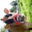

In [51]:
image_data = train[b'data'][0].reshape([32, 32, 3], order='F') # order 사용에 주의하자
image = Image.fromarray(image_data) # Pillow를 사용하여 numpy배열을 Image객체로 만든다.
image

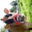   
뭔가 이상하다.... X축과 Y축이 뒤집어 나온거 같은데.....   
축을 바꿔주는 작업을 해보자.(`np.swapaxes(0, 1)`)

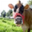

In [14]:
image_data = image_data.swapaxes(0, 1) # X, Y 축 바꿔주기
image = Image.fromarray(image_data)
image

자!! 이제 CIFAR-100의 데이터셋 원본을 분석하여 이미지 파일을 뽑아보았다.   
그럼 엄청나게 많은 이미지 파일을 실제 파일처럼 바꿔보려고하는데.......   
데이터셋에 파일명과 파일 데이터 배열이 순서를 따라 저장되어 있는 것을 확인했으니까   
numpy배열로 읽어서 이미지 파일로 저장을 해보자.

In [15]:
import os
import pickle
from PIL import Image
import numpy
from tqdm import tqdm

dir_path = '/content/gdrive/MyDrive/AIFFEL/python_image_proc/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

# image를 저장할 cifar-100-python의 하위 디렉토리(images)를 생성
images_dir_path = '/content/gdrive/MyDrive/AIFFEL/python_image_proc/cifar-images'
if not os.path.exists(images_dir_path):
  os.mkdir(images_dir_path)

# 32 X 32의 이미지 파일 50000개 생성
with open(train_file_path, 'rb') as f:
  train = pickle.load(f, encoding='bytes')
  for i in tqdm(range(len(train[b'filenames']))):
    filename = train[b'filenames'][i].decode()
    data = train[b'data'][i].reshape([32, 32, 3], order='F')
    image = Image.fromarray(data.swapaxes(0, 1))
    image.save(os.path.join(images_dir_path, filename))

100%|██████████| 50000/50000 [05:57<00:00, 139.74it/s]


cifar-images 폴더를 생성하여 50000장의 사진이 저장된 것을 확인 할 수 있다.   
용량 많다 사진 지우자

# 5. OpenCV


- [**OpenCV**](https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html)는 오픈소스로 제공되는 컴퓨터 비전용 라이브러리이다.
- C++, Python, Java, MATLAB 등 다양한 언어에서 호출이 가능하다.


이미지에서 특정 색을 가진 영역만 추출하는 예제를 한번 살펴보자.


[Changing Colorspaces](https://docs.opencv.org/4.x/df/d9d/tutorial_py_colorspaces.html)   


앞서 배운 Pillow에서는 이미지는 결국 `[너비, 높이, 채널]`형태를 가지는 배열이고,   
컴퓨터 비전이란 결국 배열 형태의 데이터를 처리하는 것이 중요하는 것을 알았다.


- 이미지 내용 중 관심있는 부분이 특정 색을 가지고 있다면(예: 파랑),   
이 정보를 통해 원하는 부분을 배경으로 구분하거나 따로 떼어낼 수 있다.
- 아래의 사진은 이미지를 읽어오고, 파란색을 찾기 쉽도록 컬러스페이스를 BGR(RGB)에서   
HSV로 변환한 뒤, 해당 색상과 맞는 영역만 표시하는 작업이다.   


![](https://media.vlpt.us/images/dyeudsla/post/eb1bdc04-994e-46ed-b1aa-e72b8c03222f/Screen%20Shot%202021-07-14%20at%2010.43.48%20PM.png)


> **주의!**   
OpenCV에서는 RGB 순이 아닌 **BGR순**이다.


- 아래 코드를 한번 살펴보자.

OpenCV는 BGR순이여서 색상이 다르게 나온다는 것을 알 수 있다.


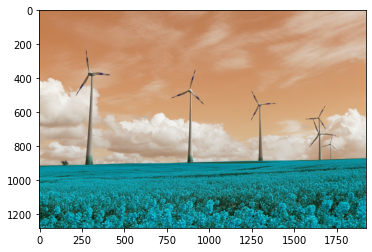


Convert BGR to HSV(파란색 범위 정의


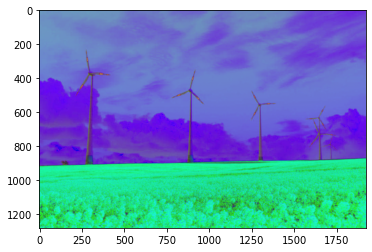


Convert BGR to RGB


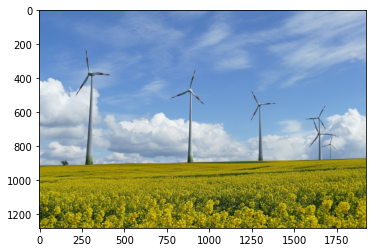

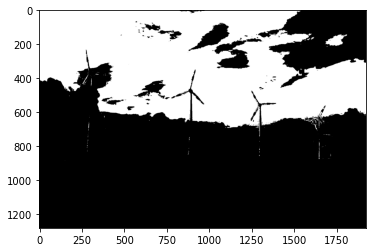

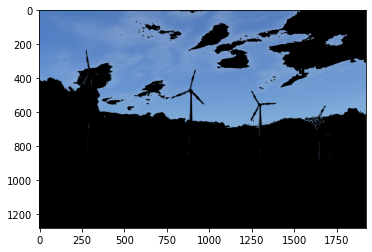

In [16]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_path = "/content/gdrive/MyDrive/AIFFEL/python_image_proc/cv_practice.png"
img_bgr = cv.imread(img_path) # 파일로부터 이미지를 읽어와 반환해주는 함수
img_show = img_bgr.copy()
plt.imshow(img_bgr)
print('OpenCV는 BGR순이여서 색상이 다르게 나온다는 것을 알 수 있다.')
plt.show()

# Convert BGR to HSV
hsv = cv.cvtColor(img_bgr, cv.COLOR_BGR2HSV) # 컬러 스페이스 변환(convert)을 위한 함수
plt.imshow(hsv)
print('\nConvert BGR to HSV(파란색 범위 정의')
plt.show()

# define range of blue color in HSV
# 숫자로 파란색 부분을 정의하고, 이 값들을 기준으로 이미지에 마스크 생성(누끼 같은 느낌?)
lower_blue = np.array([100, 100, 100])
upper_blue = np.array([130, 255, 255])

# Threshold the HSV image to get only blue colors
# 변환한 HSV에 (lower_blue, upper_blue)를 적용하여, 해당하는 픽셀은 1, 아니면 0을
# 찍어놓은 배열을 반환하는것
mask = cv.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv.bitwise_and(img_bgr, img_bgr, mask=mask)

plt.imshow(cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB))
print('\nConvert BGR to RGB')
plt.show()
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
plt.show()

> `mask = cv.inRange(hsv, lower_blue, upper_blue)`   
만약 가로 400, 세로 300 픽셀 이미지를 받았다면,   
img과 hsv는 각각 픽셀당 BGR, HSV 세개의 색상 채널별 값으로 
(400 X 300 X 3)의 크기를 갖는 배열이고,   
`mask`는 픽셀마다 **1 또는 0**의 값이여서 **(400 X 300 X 1)의 크기**를 갖는다.   
original frame으로 mask를 만든 뒤 1을 흰색, 0을 검정색으로 표시한다면 아래 그림의 가운데와 같을 것이다.

![](https://media.vlpt.us/images/dyeudsla/post/eb1bdc04-994e-46ed-b1aa-e72b8c03222f/Screen%20Shot%202021-07-14%20at%2010.43.48%20PM.png)

## 6. 비슷한 이미지 찾아내기
### CIFAR-100 이미지 중 비슷한 이미지 찾아내기


---
- OpenCV를 이용하여 **이미지에서 색상 히스토그램을 추출하고, 서로 비교하는 기능**을 사용해보자.
- **히스토그램**: 이미지에서 픽셀 별 색상 값의 분포
  - 히스토그램을 통해 각 이미지의 색상 분포를 비교하여 서로 유사한 이미지를 판단하는 척도로 사용


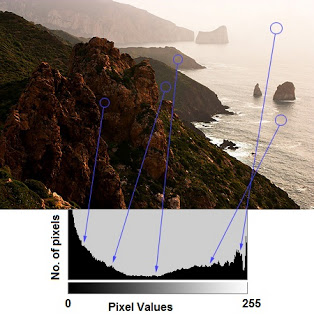

- 위 사진은 이미지를 흑백으로 변환했을 때 밝기에 따른 히스토그램이다.   
- RGB 각 채널별 분포를 사용할 것이다.
- 0 ~ 255 각 픽셀 수를 일일이 저장은 힘드니, 단순화를 위해 4개 구간   
(0 ~ 63, 64 ~ 127, 128 ~ 191, 192 ~ 255) 나누어 픽셀 수를 센다.

In [41]:
import os
import pickle
import cv2 as cv
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image

# 전처리 시 생성했던 디렉토리 구조
dir_path = "/content/gdrive/MyDrive/AIFFEL/python_image_proc"
train_file_path = os.path.join(dir_path, 'train')
images_dir_path = os.path.join(dir_path, 'cifar-images')

- 저장해둔 CIFAR-100 이미지를 불러 히스토 그램을 그려보자

In [42]:
# 파일명을 인자로 받아 해당 이미지 파일과 히스토그램을 출력해 주는 함수
def draw_color_histogram_from_image(file_name):
    image_path = os.path.join(images_dir_path, file_name)
    # 이미지 열기
    img = Image.open(image_path)
    cv_image = cv2.imread(image_path)

    # Image와 Histogram 그려보기
    f=plt.figure(figsize=(10,3))
    im1 = f.add_subplot(1,2,1)
    im1.imshow(img)
    im1.set_title("Image")

    im2 = f.add_subplot(1,2,2)
    color = ('b','g','r')
    for i,col in enumerate(color):
        # image에서 i번째 채널의 히스토그램을 뽑아서(0:blue, 1:green, 2:red)
        histr = cv2.calcHist([cv_image],[i],None,[256],[0,256])   
        im2.plot(histr,color = col)   # 그래프를 그릴 때 채널 색상과 맞춰서 그립니다.
    im2.set_title("Histogram")

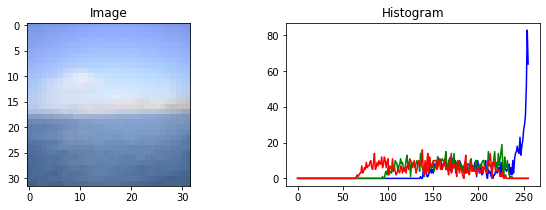

In [43]:
draw_color_histogram_from_image('adriatic_s_001807.png')

- 히스토그램을 보니 파란색이 많이 튄다.

## 비슷한 이미지를 찾는 프로그램을 설계해보자.
### STEP 1. 아이디어 개요
1. ***프로그램이 실행***
2. ***입력된 경로의 이미지 파일을 불러옴***
3. ~~검색 대상 이미지들 중 불러온 이미지와 가장 비슷한 이미지 5개 표시~~
4. ~~프로그램 종료~~


> **히스토그램을 통해 이미지를 비교**   
히스토그램을 만든어주는 함수 `cv2.calcHist()`와 마찬가지로,   
히스토그램끼리 유사성을 계산해주는 기능도 OpenCV에서 제공하는   
`cv2.compareHist()` 함수를 이용


> **이미지 파일 경로를 명령줄에서 입력 받기**   
`sys.argv`를 이용

### STEP 2. 아이디어 구체화
1. ~~프로그램이 실행~~
2. ~~입력된 경로의 이미지 파일을 불러옴~~
3. **검색 대상 이미지들 중 불러온 이미지와 가장 비슷한 이미지 5개 선택**
  - **검색 대상 이미지들 불러오기**
  - **입력 이미지와 비교하여 유사도를 기준으로 순서 매김**
  - **유사도 순서상 상위 5개 이미지 선택**
4. ***고른 이미지들 표시***
4. ~~프로그램 종료~~


### STEP 3. 핵심 알고리즘 - 유사도 계산 방법
1. ~~프로그램이 실행~~
2. ~~입력된 경로의 이미지 파일을 불러옴~~
3. 검색 대상 이미지들 중 불러온 이미지와 가장 비슷한 이미지 5개 선택
  - 검색 대상 이미지들 불러오기
  - **입력 이미지와 비교하여 유사도를 기준으로 순서 매김**
    - **입력 이미지와 검색 대상 이미지들 사이의 유사도 계산**
      - **입력 이미지와 검색 대상 이미지들을 하나하나 히스토그램으로 만듦**
      - **OpenCV의 `compareHist()` 함수를 사용하여 입력 이미지와 검색 대상 이미지 하나하나의 히스토그램 간 유사도 계산**
    - **계산된 유사도를 기준으로 정렬하여 순서 매김**
  - 유사도 순서상 상위 5개 이미지 선택
4. 고른 이미지들 표시
5. ~~프로그램 종료~~


### STEP 4. 기능의 모듈화
정리 후 단계별로 함수로 묶어주자.


- 입력 이미지를 히스토그램으로 만듦
- `build_histogram_db()`
  - 검색 대상 이미지들을 불러옴
  - 검색 대상 이미지들을 하나하나 히스토그램으로 만듦

- `search()`
  - OpenCV의 compareHist() 함수를 사용하여 입력 이미지와 검색 대상 이미지 하나하나의 히스토그램 간 유사도를 계산
  - 계산된 유사도를 기준으로 정렬하여 순서를 매김
  - 유사도 순서상으로 상위 5개 이미지를 선택

### STEP 5. 설계 과정 완성
각 함수에 입력되고 반환될 데이터의 형태와 변수명 정하기



- 프로그램이 실행
- `build_histogram_db()`
  - CIFAR-100 이미지들을 불러옴
  - CIFAR-100 이미지들을 하나하나 히스토그램으로 만듦
  - 이미지 이름을 키로 하고, 히스토그램을 값으로 하는 딕셔너리 `histogram_db`를 반환
- CIFAR-100 히스토그램 중 입력된 이미지 이름에 해당하는 히스토그램을 입력 이미지로 선택하여 `target_histogram`이라는 변수명으로 지정
- `search()`
  - 입력 이미지 히스토그램 `target_histogram`와 전체 검색 대상 이미지들의 히스토그램을 가진 딕셔너리 `histogram_db`를 입력으로 받음
  - OpenCV의 `compareHist()` 함수를 사용하여 입력 이미지와 검색 대상 이미지 하나하나의 히스토그램 간 유사도를 계산,   
  결과는 `result`라는 이름의 딕셔너리로, 키는 이미지 이름, 값은 유사도 지정
  - 계산된 유사도를 기준으로 정렬하여 순서를 매김
  - 유사도 순서상으로 상위 5개 이미지만 골라서 `result`에 남김
- 고른 이미지들을 표시
- 프로그램이 종료

### STEP 6. 코드로 구현

In [44]:
def get_histogram(image):
    histogram = []

    # 채널당 4개의 bin으로 히스토그램을 만들기
    for i in range(3):
        channel_histogram = cv2.calcHist(images=[image],
                                         channels=[i],
                                         mask=None,
                                         histSize=[4],  # 히스토그램 구간을 4개로 한다.
                                         ranges=[0, 256])
        histogram.append(channel_histogram)  

    histogram = np.concatenate(histogram)
    histogram = cv2.normalize(histogram, histogram)

    return histogram

- 우선 `build_histogram_db()`를 구현
- test에서 변환시켜 저장한 이미지 폴도 `cifar-images`에 있는   
모든 이미지 파일 대상으로 히스토그램 만들기
- 우선 이미지 파일 1개에 대해 히스토그램을 만드는 함수 만들기
- 단수화 측면에서 4개 구간(0 ~ 63, 64 ~ 127, 128 ~ 191, 192 ~ 255)로 나누어   
픽셀 수를 세자.

In [45]:
# get_histogram() 확인용 코드
filename = train[b'filenames'][0].decode()
file_path = os.path.join(images_dir_path, filename)
image = cv2.imread(file_path)
histogram = get_histogram(image)
histogram

array([[0.3126804 ],
       [0.4080744 ],
       [0.14521089],
       [0.21940625],
       [0.18654831],
       [0.23742512],
       [0.30208108],
       [0.35931748],
       [0.06465594],
       [0.35825753],
       [0.36991683],
       [0.29254165]], dtype=float32)

- `get_histogram()`이 정상 동작한다면, `build_histogram_db()`를 구해보자.

In [46]:
def build_histogram_db():
    histogram_db = {}

    #디렉토리에 모아 둔 이미지 파일들을 전부 리스트업합니다. 
    path = images_dir_path
    file_list = os.listdir(images_dir_path)

    for file_name in tqdm(file_list):
        file_path = os.path.join(images_dir_path, file_name)
        image = cv2.imread(file_path)

        histogram = get_histogram(image)

        histogram_db[file_name] = histogram

    return histogram_db

- `build_histogram_db()`을 실행, 검증을 해보자.
- 잘 만들어졌다면, 함수가 리턴할 객체 `histogram_db`는   
histogram_db['adriatic_s_001807.png']을 호출했을 때 12X1의 Numpy배열을 리턴한다.

In [47]:
histogram_db = build_histogram_db()
histogram_db['adriatic_s_001807.png']

100%|██████████| 49999/49999 [03:45<00:00, 221.36it/s]


array([[0.        ],
       [0.        ],
       [0.29744893],
       [0.5828624 ],
       [0.        ],
       [0.17107612],
       [0.41608465],
       [0.29315054],
       [0.        ],
       [0.34301192],
       [0.37224102],
       [0.16505837]], dtype=float32)

- `histogram_db`가 완성되었다.
- 다음으로는 `target_histogram`에 입력받은 이미지의 히스토그램을 저장하는 함수를 만들자.

- 파이썬 모듈에서는 `sys.argv[1]`에 검색하고 싶은 이미지 파일명을 입력받지만,   
아래와 같이 `input`으로 직접 받아보자.

In [32]:
def get_target_histogram():
    filename = input("이미지 파일명을 입력하세요: ")
    if filename not in histogram_db:
        print('유효하지 않은 이미지 파일명입니다.')
        return None
    return histogram_db[filename]

In [34]:
target_histogram = get_target_histogram()
target_histogram

이미지 파일명을 입력하세요: adriatic_s_001807.png


array([[0.        ],
       [0.        ],
       [0.29744893],
       [0.5828624 ],
       [0.        ],
       [0.17107612],
       [0.41608465],
       [0.29315054],
       [0.        ],
       [0.34301192],
       [0.37224102],
       [0.16505837]], dtype=float32)

In [36]:
def search(histogram_db, target_histogram, top_k=5):
    results = {}

    # Calculate similarity distance by comparing histograms.
    for file_name, histogram in tqdm(histogram_db.items()):
        distance = cv2.compareHist(H1=target_histogram,
                                   H2=histogram,
                                   method=cv2.HISTCMP_CHISQR) # 비교방법(HISTCMP_CHISQR)

        results[file_name] = distance

    results = dict(sorted(results.items(), key=lambda item: item[1])[:top_k])

    return results

- search 함수 만들기
- search함수는 입력 이미지 히스토그램 `target_histogram`와 전체 검색 대상 이미지들의   
히스토그램을 가진 딕셔너리 `histogram_db`을 입력받는다.
- 입력부에 유사도 수능로 몇 개 까지 결과로 출력할지 `top_k=5` 파라미터 추가

In [37]:
result = search(histogram_db, target_histogram)
result

100%|██████████| 49999/49999 [00:00<00:00, 446801.09it/s]


{'adriatic_s_001807.png': 0.0,
 'baby_s_001654.png': 0.047506706444185816,
 'dessert_plate_s_000124.png': 0.06113711905561663,
 'fogbank_s_000423.png': 0.059270738493642845,
 'tank_s_000442.png': 0.060966690827361725}

In [38]:
def show_result(result):
    f=plt.figure(figsize=(10,3))
    for idx, filename in enumerate(result.keys()):    
        img_path = os.path.join(images_dir_path, filename)
        im = f.add_subplot(1,len(result),idx+1)
        img = Image.open(img_path)
        im.imshow(img)

- result를 입력받아 5개의 이미지를 화면에 출력하는 함수 만들기

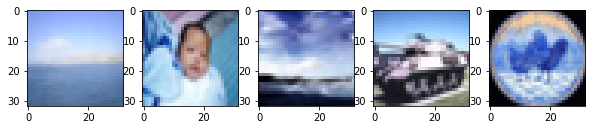

In [39]:
show_result(result)

이미지 파일명을 입력하세요: adriatic_s_001807.png


100%|██████████| 49999/49999 [00:00<00:00, 422236.64it/s]


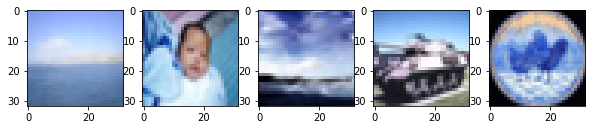

In [52]:
target_histogram = get_target_histogram()
result = search(histogram_db, target_histogram)
show_result(result)